In [15]:
import pandas as pd
import seaborn as sns
import numpy as np

# Load iris dataset (it's already a DataFrame)
iris = sns.load_dataset("iris")

In [16]:
df = pd.DataFrame(iris)

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:

from sklearn.preprocessing import LabelEncoder

In [19]:

encoder = LabelEncoder()

In [20]:
df['species'] = encoder.fit_transform(df['species'])

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [23]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [24]:

import seaborn as sns
import matplotlib.pyplot as plt

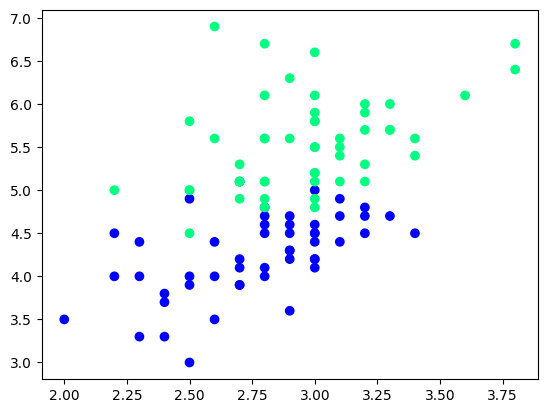

In [25]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')


In [26]:

df_train = df.iloc[:60,:].sample(10)
df_train

,sepal_width,petal_length,species
93,2.3,3.3,1
71,2.8,4.0,1
95,3.0,4.2,1
86,3.1,4.7,1
102,3.0,5.9,2
107,2.9,6.3,2
108,2.5,5.8,2
58,2.9,4.6,1
69,2.5,3.9,1
91,3.0,4.6,1


In [27]:

# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [28]:

df_train

,sepal_width,petal_length,species
82,2.7,3.9,1
112,3.0,5.5,2
109,3.6,6.1,2
123,2.7,4.9,2
149,3.0,5.1,2
114,2.8,5.1,2
99,2.8,4.1,1
133,2.8,5.1,2
134,2.6,5.6,2
145,3.0,5.2,2


In [29]:
df_val

,sepal_width,petal_length,species
118,2.6,6.9,2
147,3.0,5.2,2
83,2.7,5.1,1
121,2.8,4.9,2
74,2.9,4.3,1


In [30]:
df_test

,sepal_width,petal_length,species
116,3.0,5.5,2
52,3.1,4.9,1
67,2.7,4.1,1
129,3.0,5.8,2
136,3.4,5.6,2


In [31]:

X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [32]:
y_test

array([2, 2, 1, 2, 1])

# case 1 - bagging

In [33]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
82,2.7,3.9,1
134,2.6,5.6,2
133,2.8,5.1,2
134,2.6,5.6,2
145,3.0,5.2,2
99,2.8,4.1,1
99,2.8,4.1,1
112,3.0,5.5,2


In [34]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [35]:

dt_bag1 = DecisionTreeClassifier()

In [36]:

def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

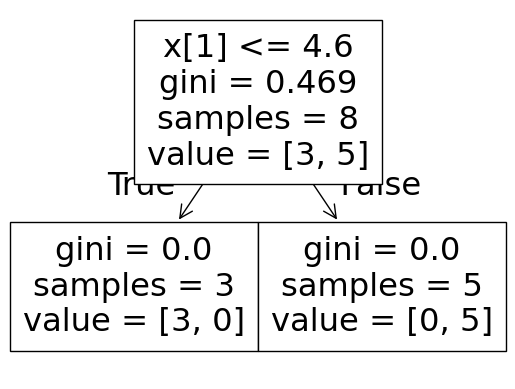

C:\Users\Deepti Devaiah\anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Deepti Devaiah\anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


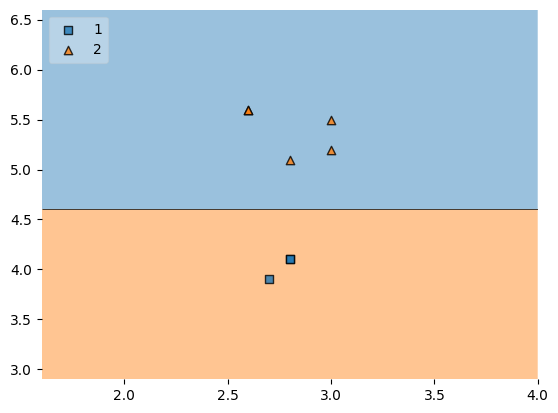

In [37]:

evaluate(dt_bag1,X,y)

In [38]:

# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
112,3.0,5.5,2
112,3.0,5.5,2
145,3.0,5.2,2
112,3.0,5.5,2
123,2.7,4.9,2
99,2.8,4.1,1
114,2.8,5.1,2
133,2.8,5.1,2


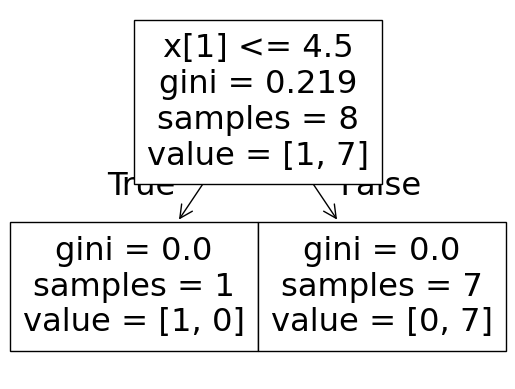

C:\Users\Deepti Devaiah\anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Deepti Devaiah\anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


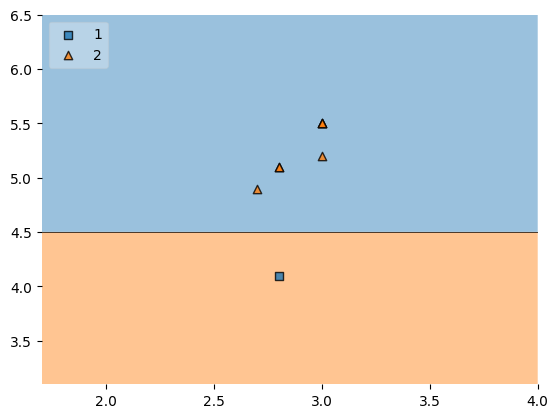

In [39]:

dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [40]:

# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
149,3.0,5.1,2
133,2.8,5.1,2
145,3.0,5.2,2
112,3.0,5.5,2
82,2.7,3.9,1
145,3.0,5.2,2
112,3.0,5.5,2
114,2.8,5.1,2


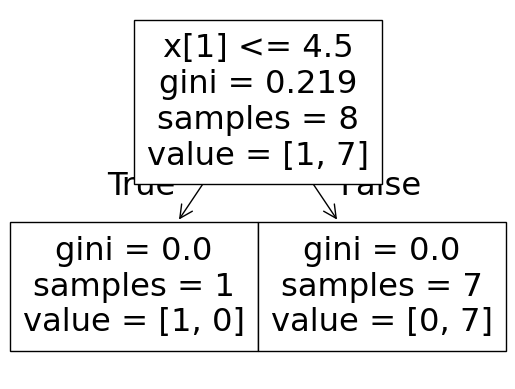

C:\Users\Deepti Devaiah\anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Deepti Devaiah\anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


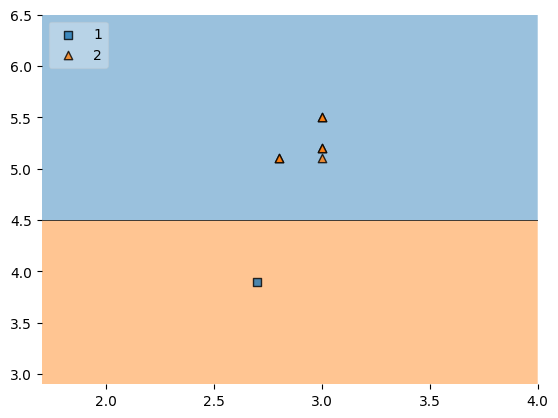

In [41]:

dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# predict

In [42]:
df_test

,sepal_width,petal_length,species
116,3.0,5.5,2
52,3.1,4.9,1
67,2.7,4.1,1
129,3.0,5.8,2
136,3.4,5.6,2


In [43]:

print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\Deepti Devaiah\anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Deepti Devaiah\anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Deepti Devaiah\anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# pasting

In [45]:

# Row sampling without replacement
df_train

,sepal_width,petal_length,species
82,2.7,3.9,1
112,3.0,5.5,2
109,3.6,6.1,2
123,2.7,4.9,2
149,3.0,5.1,2
114,2.8,5.1,2
99,2.8,4.1,1
133,2.8,5.1,2
134,2.6,5.6,2
145,3.0,5.2,2


In [46]:

df_train.sample(8)

,sepal_width,petal_length,species
134,2.6,5.6,2
99,2.8,4.1,1
112,3.0,5.5,2
133,2.8,5.1,2
145,3.0,5.2,2
149,3.0,5.1,2
114,2.8,5.1,2
123,2.7,4.9,2


# random subspaces

In [ ]:
iris = sns.load_dataset("iris")
